In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_excel('total_a.xlsx')

In [34]:
USD_index = df[df['Market_and_Exchange_Names'] == 'U.S. DOLLAR INDEX - ICE FUTURES U.S.']
USD_index['Date']=USD_index.loc[:,'Report_Date_as_MM_DD_YYYY'].copy()
USD_index=USD_index.set_index('Date').sort_index(ascending=True)
USD_index.head()

C:\Users\bearp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Open_Interest_Other,NonComm_Positions_Long_Other,NonComm_Positions_Short_Other,NonComm_Positions_Spread_Other,Comm_Positions_Long_Other,Comm_Positions_Short_Other,Tot_Rept_Positions_Long_Other,Tot_Rept_Positions_Short_Other,NonRept_Positions_Long_Other,NonRept_Positions_Short_Other
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,U.S. DOLLAR INDEX - ICE FUTURES U.S.,110104,2011-01-04,098662,ICUS,1,98,28106,18598,19870,...,0,0,0,0,0,0,0,0,0,0
2011-01-11,U.S. DOLLAR INDEX - ICE FUTURES U.S.,110111,2011-01-11,098662,ICUS,1,98,36854,23940,13859,...,0,0,0,0,0,0,0,0,0,0
2011-01-18,U.S. DOLLAR INDEX - ICE FUTURES U.S.,110118,2011-01-18,098662,ICUS,1,98,33352,20227,14998,...,0,0,0,0,0,0,0,0,0,0
2011-01-25,U.S. DOLLAR INDEX - ICE FUTURES U.S.,110125,2011-01-25,098662,ICUS,1,98,39751,24307,22839,...,0,0,0,0,0,0,0,0,0,0
2011-02-01,U.S. DOLLAR INDEX - ICE FUTURES U.S.,110201,2011-02-01,098662,ICUS,1,98,42970,26235,29752,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Making additional data for analysis
USD_index['NonComm_Sum']=USD_index.NonComm_Positions_Long_All - USD_index.NonComm_Positions_Short_All
USD_index['Comm_Sum']=USD_index.Comm_Positions_Long_All - USD_index.Comm_Positions_Short_All
USD_index['Sum']=USD_index.NonComm_Sum+USD_index.Comm_Sum


In [44]:
dxy = pd.read_excel('C:/Users/bearp/Documents/Forex/DB/DX-Y.NYB.xlsx',index_col=0)

In [105]:
USD_agg = pd.merge(USD_index,dxy.Close,on='Date')
USD_agg['NonComm_Avg'] = USD_agg.NonComm_Sum.rolling(4).mean()
USD_agg['Comm_Avg']=USD_agg.Comm_Sum.rolling(4).mean()
USD_agg['Close_Avg']=USD_agg.Close.rolling(4).mean()

In [26]:
import plotly.express as px
import plotly.graph_objects as go

In [106]:
# To run go
USD_agg= USD_agg.reset_index()

In [110]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=USD_agg.Date, y=USD_agg['Close'], name="DXY", line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=USD_agg.Date, y=USD_agg['Close_Avg'], name="DXY_M", line_color='dimgrey'))
fig.show()

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.Date, y=test['NonComm_Sum'], name="NonComm_Sum", line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=test.Date, y=test['Comm_Sum'], name="Comm_Sum", line_color='dimgrey'))
fig.show()

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.Date, y=test['Sum'], name="Sum", line_color='deepskyblue'))
fig.show()

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.Date, y=test['Close'], name="DXY", line_color='deepskyblue'))
fig.show()

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [111]:
# To run Heat map
heat = USD_agg.loc[:,['Open_Interest_All','Sum','Close','Close_Avg','NonComm_Sum','NonComm_Avg','NonComm_Positions_Long_All','NonComm_Positions_Short_All','NonComm_Postions_Spread_All','Comm_Sum','Comm_Avg','Comm_Positions_Long_All','Comm_Positions_Short_All']]

In [112]:
USD_corr = heat.corr()

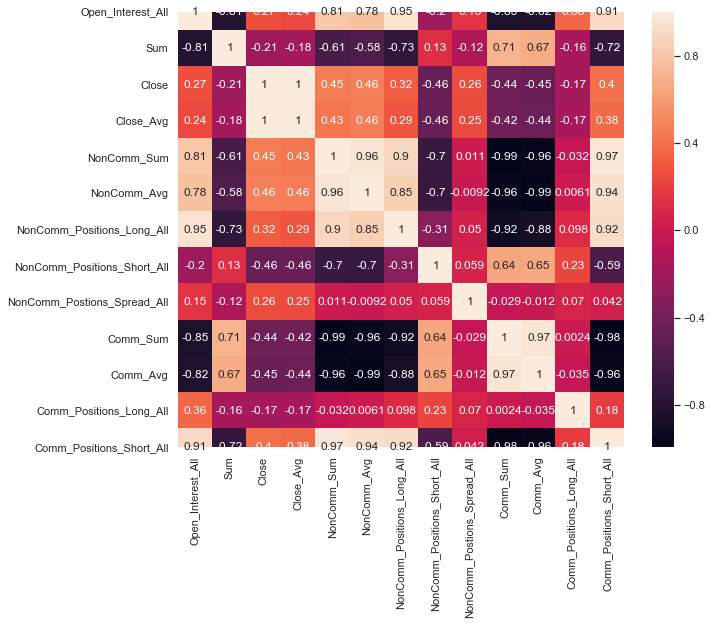

In [113]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(USD_corr, annot=True, ax=ax)

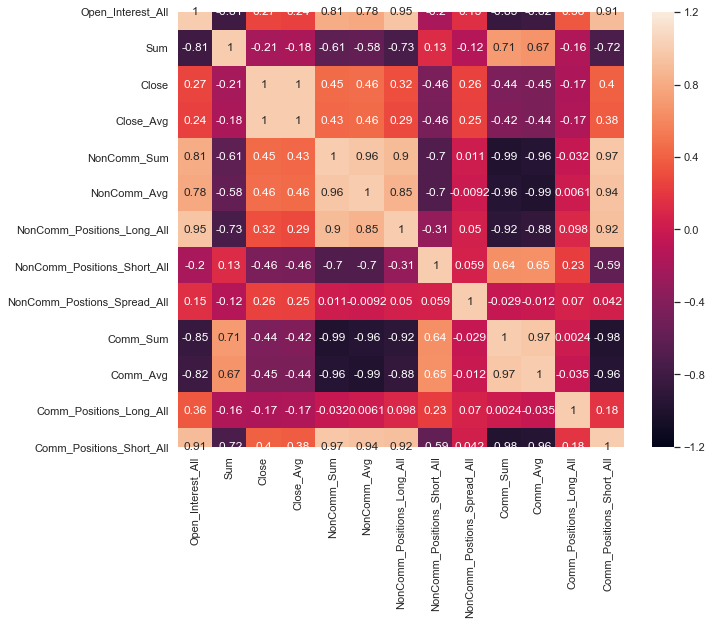

In [114]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(USD_corr, annot=True,vmin=-1.2, vmax=1.2, ax=ax)

In [115]:
# Find the number of null values in dataset
test.isnull().sum().sum()

0

In [116]:
# Find the rows that have null values in dataset
test.isnull().sum()

Date                              0
Market_and_Exchange_Names         0
As_of_Date_In_Form_YYMMDD         0
Report_Date_as_MM_DD_YYYY         0
CFTC_Contract_Market_Code         0
CFTC_Market_Code                  0
CFTC_Region_Code                  0
CFTC_Commodity_Code               0
Open_Interest_All                 0
NonComm_Positions_Long_All        0
NonComm_Positions_Short_All       0
NonComm_Postions_Spread_All       0
Comm_Positions_Long_All           0
Comm_Positions_Short_All          0
Tot_Rept_Positions_Long_All       0
Tot_Rept_Positions_Short_All      0
NonRept_Positions_Long_All        0
NonRept_Positions_Short_All       0
Open_Interest_Old                 0
NonComm_Positions_Long_Old        0
NonComm_Positions_Short_Old       0
NonComm_Positions_Spread_Old      0
Comm_Positions_Long_Old           0
Comm_Positions_Short_Old          0
Tot_Rept_Positions_Long_Old       0
Tot_Rept_Positions_Short_Old      0
NonRept_Positions_Long_Old        0
NonRept_Positions_Short_Old 

In [ ]:
Open_Interest_All	NonComm_Positions_Long_All	NonComm_Positions_Short_All	NonComm_Postions_Spread_All	Comm_Positions_Long_All	Comm_Positions_Short_All	Tot_Rept_Positions_Long_All	Tot_Rept_Positions_Short_All	NonRept_Positions_Long_All	NonRept_Positions_Short_All	Open_Interest_Old	NonComm_Positions_Long_Old	NonComm_Positions_Short_Old	NonComm_Positions_Spread_Old	Comm_Positions_Long_Old	Comm_Positions_Short_Old	Tot_Rept_Positions_Long_Old	Tot_Rept_Positions_Short_Old	NonRept_Positions_Long_Old	NonRept_Positions_Short_Old	Open_Interest_Other	NonComm_Positions_Long_Other	NonComm_Positions_Short_Other	NonComm_Positions_Spread_Other	Comm_Positions_Long_Other	Comm_Positions_Short_Other	Tot_Rept_Positions_Long_Other	Tot_Rept_Positions_Short_Other	NonRept_Positions_Long_Other	NonRept_Positions_Short_Other
